<a href="https://colab.research.google.com/github/abdala9512/fake-news-poc/blob/main/notebooks/AnalisisExploratorioFakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis exploratorio 1

#### Librerias

In [1]:
#pip install unidecode

In [2]:
# NLKT
import nltk
nltk.download('all')
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [3]:
# Modulos nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import ConditionalFreqDist
# Otras librerias
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import chardet
import unidecode
import statistics
import os

In [4]:
# Stopwords
stop_words = set(stopwords.words(['spanish','english']))

# Importar datos

In [5]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Rutas
root_true = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Veridicas'
root_fake = '/content/drive/MyDrive/ProyectoGrado/Datos/data_fake_news/Falsas'

In [7]:
# Noticias falsas
fake_list = PlaintextCorpusReader(root_fake, '.*')
fake_news =list(set(fake_list.fileids()))

# Carga de archivos
fake_docs_raw = []

# lectura 
for file in fake_news:
    with open(root_fake+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        fake_list = PlaintextCorpusReader(root_fake, file, encoding=encoding)
        fake_docs_raw.append(fake_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias falsas: " , len(fake_docs_raw))

Error: unable to decode F-No, este pantallazo no prueba que Tribunal de Colombia ordenó suspender el plan de vacunación.txt with encoding Windows-1254
Error: unable to decode F- Mensaje desinforma sobre restricciones en varios países por cuarta ola de COVID-19.txt with encoding Windows-1254
Error: unable to decode F- Escándalo por comercialización de vacuna Pfizer contra COVID sin estudio de contagio es desinformación..txt with encoding Windows-1254
Error: unable to decode F- EL DIÓXIDO DE CLORO NO CURA LA COVID-19 COMO RECOMIENDA LA MODELO COLOMBIANA NATALIA PARÍS.txt with encoding Windows-1254
Cantidad de noticias falsas:  292


In [8]:
# Noticias veridicas
true_list = PlaintextCorpusReader(root_true, '.*')
true_news =list(set(true_list.fileids())) 

# Carga de archivos
true_docs_raw = []

# lectura 
for file in true_news:
    with open(root_true+'/'+file, 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    
    try:
        true_list = PlaintextCorpusReader(root_true, file, encoding=encoding)
        true_docs_raw.append(true_list.raw(file))
    except UnicodeDecodeError:
        print(f"Error: unable to decode {file} with encoding {encoding}")

# cantidad de noticias
print("Cantidad de noticias veridicas: " , len(true_docs_raw))

Cantidad de noticias veridicas:  237


# Funciones

In [9]:
def plot_lexical_diversity_dist(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara la diversidad lexica
  '''
  diversidades = []
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    frecuencias = FreqDist(tokens)
    if len(tokens) > 0:
      diversidad_lexica = len(frecuencias) / len(tokens)
      diversidades.append(diversidad_lexica)
  plt.hist(diversidades)
  plt.title("*Distribución de la diversidad léxica*" + " - " "Diversidad lexica media: " + str(round(sum(diversidades) / len(diversidades),4)) + " - " + "Desviación : " + str(round(statistics.stdev(diversidades),4)))
  plt.xlabel("Diversidad léxica")
  plt.ylabel("Frecuencia")
  
plt.show()

In [10]:
def plot_tokens_text(docs):
  '''
  docs: listado con documentos (textos) a los cuales se les calculara el número de tokens
  '''
  num_tokens = []
  num_tokens_unicos = []
  
  for text in docs:
    # limpieza
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # calculo
    tokens = nltk.word_tokenize(text.lower())
    tokens = [w for w in tokens if not w in stopwords.words('spanish') and not w in string.punctuation]
    frecuencias = FreqDist(tokens)
    num_tokens.append(len(tokens))
    num_tokens_unicos.append(len(frecuencias))
    
  # Gráfico
  plt.figure(figsize=(10,5))
  plt.hist(num_tokens, alpha=0.5, label='Número de Tokens')
  plt.hist(num_tokens_unicos, alpha=0.5, label='Número de Tokens Únicos')
  plt.title("*Distribución de número de tokens y número de tokens únicos por texto*")
  plt.xlabel("Cantidad de tokens")
  plt.ylabel("Frecuencia")
  plt.legend(loc='upper right')
  plt.show()

In [11]:
def process_text(textCorpus,nameText, nFQ, nL):
    '''
    Esta función permite procesas el texto y permite obtener algunas estadísticas de interes asociadas al texto procesado.
    text: Nombre del texto a procesar.
    nFQ: Número de tokens más frecuentes a obtener.
    nL: logitud para determinar palabras más largas
    '''
    # Se obtiene el texto de objeto Corpus
    name = nameText
    raw_text = textCorpus.raw(nameText)

    #0. Texto 
    raw_text = raw_text.translate(str.maketrans('', '', string.punctuation)) # Eliminar puntuación
    raw_text = re.sub('[¡!¿?\\-»()[]«“”•]', '', raw_text) # Eliminar algunos caracteres especiales que se identifican en el texto

    # 1. Tokenización
    tokens_doc = nltk.word_tokenize(raw_text.lower()) # Tekenizar el texto 

    # 2. Limpieza
    stop_words = set(stopwords.words(['spanish','english'])) # Listado de stopwords 
    tokens_sw = [token for token in tokens_doc if not token in stop_words] # Seleccionar los tokens que no son stopwords
    
    table = str.maketrans('', '', string.punctuation) # Eliminar de los tokens la puntuación parte 1
    tokens = [w.translate(table) for w in tokens_sw] # Eliminar de los tokens la puntuación parte 2
    tokens = [unidecode.unidecode(w.translate(table)) for w in tokens_sw] # Eliminar de los tokens los acentos

    tokens = [token.strip() for token in tokens] # 
    tokens = [token for token in tokens if token != ''] # Eliminar tokens vacios
    tokens = [token for token in tokens if not token.isdigit()] # Eliminar tokens numericos

    # 3. Cálculo de estadísticas

    # Oraciones y tokens
    num_sent = len(textCorpus.sents(nameText)) # Extrae en una lista las oraciones del texto, el texto es un objeto PlaintextCorpusReader y se ingresa a el por el nombre del archivo 
    num_tkns = len(textCorpus.words(nameText)[:]) # Extra en una lista las palabras del texto, el texto es un objeto PlaintextCorpusReader y se ingresa a el por el nombre del archivo 
    
    # Oraciones y tokens promedio
    if len(textCorpus.paras(nameText)) > 0:
      mean_sent = sum(len(p) for p in textCorpus.paras(nameText)) / float(len(textCorpus.paras(nameText)))
      mean_tkns = sum(len(s) for s in textCorpus.sents(nameText)) / float(len(textCorpus.sents(nameText)))
    else: 
      mean_sent = 0
      mean_tkns = 0

    # Número de tokens sin stopwords
    num_tokens = len(tokens_sw) # el numero de tokens se calcula sobre el total de tokens en el texto (sin stopwords)

    # Número de tokens únicos sin stopwords
    num_tokens_unique = len(set(tokens_sw)) # el numero tokens unicos se calcula sobre el total de tokens limpios (sin stopwords)

    # Número de stopwords
    num_stopwords = len(tokens_doc) - len(tokens_sw) # numero de stopwords 

    # Diversidad léxica
    if len(tokens_sw) >0:
      lexical_diversity = len(set(tokens_sw))/len(tokens_sw)
    else: 
      lexical_diversity = 0

    # 4. tokens de mayor frecuencia
    freq_dist = FreqDist(tokens) 
    most_common = freq_dist.most_common(nFQ)
    most_common_tokens = [token[0] for token in most_common]

    # 5. Hapax
    hapaxes = freq_dist.hapaxes()
    num_hapaxes = len(hapaxes)

    # 6. Palabras largas
    long_words = [w for w in freq_dist if len(w) >= nL]

    # 7. Referencias a otros sitios
    pattern =  r'https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'
    websites = re.findall(pattern, raw_text)
    numwebsites = len(websites)

    return name,mean_sent,mean_tkns, num_tokens, num_tokens_unique, num_stopwords, lexical_diversity, most_common_tokens,num_hapaxes, hapaxes, long_words, websites,numwebsites

In [12]:
tilde = lambda str: str.translate(str.maketrans("áàäéèëíìïòóöùúüÀÁÄÈÉËÌÍÏÒÓÖÙÚÜ", "aaaeeeiiiooouuuAAAEEEIIIOOOUUU"))

In [13]:
def tf_idf_prep(textCorpus,nameText, stemmer=None):
    '''
    text: texto a preparar
    stemmer: metodo de stemming, recibe ps = 'PorterStemmer', ss = 'SnowballStemmer'
    '''

    name = nameText
    raw_text = textCorpus.raw(nameText)

    # 0. Limpiar texto
    #if isinstance(text, bytes):
    #    text = text.decode('utf-8')
  
    raw_text = raw_text.translate(str.maketrans('', '', string.punctuation)) # Eliminar puntuación
    text = re.sub('[¡!¿?\\-»()[]«“”•]', '', raw_text) # Eliminar algunos caracteres especiales que se identifican en el texto

    # 1. Tokenizar
    tokens = word_tokenize(tilde(text.lower()))

    # 2. Eliminar puntuación
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]

    # 3. Segunda limpieza
    tokens = [re.sub('“|”|[|¡|!|¿|?|\|\|-|»|(|)|[|]|«|“|”|•|]', '',token) for token in tokens] # eliminar caracteres especiales
    tokens = [token.strip() for token in tokens] # eliminar espacio en blanco en los tokens
    tokens = [token for token in tokens if token != '']  # eliminar tokens vacios
    tokens = [token for token in tokens if not token.isdigit()] # eliminar tokens numericos

    # 4. Eliminar stopwords
    stop_words = set(stopwords.words(['spanish', 'english']))
    tokens = [w for w in tokens if not w in stop_words]

    # 5. Stemizar
    if stemmer == 'ps':
        stemmer = PorterStemmer()
    elif stemmer == 'ss':
        stemmer = SnowballStemmer('spanish')
    else:
        return tokens
    tokens_docs_stem = [stemmer.stem(w) for w in tokens]

    return tokens_docs_stem

In [14]:
def cosine_similarity(a, b):
    nom = np.sum(np.multiply(a, b))
    denom = np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))
    sim = nom / denom
    return sim

# Resumen

#### Fakenews

In [15]:
data = []

for nameText in fake_news:
    name,mean_sent,mean_tkns, num_tokens, num_tokens_unique, num_stopwords, lexical_diversity, most_common_tokens,num_hapaxes, hapaxes, long_words,websites,numwebsites = process_text(textCorpus = fake_list,nameText = nameText , nFQ = 10, nL = 13)
    data.append([name,mean_sent,mean_tkns, num_tokens, num_tokens_unique, num_stopwords, lexical_diversity, most_common_tokens,num_hapaxes, hapaxes, long_words, websites,numwebsites])

fakedf = pd.DataFrame(data, columns=["Archivo","OracionesPromedio","TokensPromedioOracion","NumTokens", "NumTokensUnicos", "NumStopwords", "DiversidadLexica", "TokensMayorFrecuencia", "NumHapaxes","Hapaxes", "PalabrasLargas", "WebSites","NumWebSites"]).sort_values(by = 'DiversidadLexica', ascending = False)
fakedf

,Archivo,OracionesPromedio,TokensPromedioOracion,NumTokens,NumTokensUnicos,NumStopwords,DiversidadLexica,TokensMayorFrecuencia,NumHapaxes,Hapaxes,PalabrasLargas,WebSites,NumWebSites
104,F-Microsoft no está enviando correos para ent...,1.000000,29.000000,41,37,40,0.902439,"[ayudas, microsoft, personas, enviando, correo...",34,"[enviando, correos, entregar, covid19, estafa,...","[inescrupulosas, recomendacion]",[],0
223,F-FALSO_No murió una persona en la vía públ...,1.600000,25.375000,88,75,84,0.852273,"[paciente, salud, falso, via, publica, patio, ...",61,"[murio, persona, abriles, hombre, muriera, ii,...",[actualizacion],[],0
158,F-Usan FOTO VIEJA para señalar que Claudia Lo...,1.500000,29.666667,47,39,38,0.829787,"[claudia, lopez, foto, cuarentena, imagen, usa...",32,"[usan, vieja, senalar, incumple, normas, usand...",[],[],0
154,"F-No, gobierno no está entregando 350.000 pes...",1.500000,31.777778,141,116,120,0.822695,"[gobierno, oficiales, "", informacion, cadena, ...",96,"[entregando, entidades, confirmaron, difundida...","[colombiacheck, proliferacion, supuestamente, ...",[],0
131,F-Ninguna persona ha fallecido por Covid-19 en...,2.000000,25.750000,100,82,85,0.820000,"[transmilenio, usuarios, fallecido, covid19, n...",70,"[falso, algun, usuario, producto, frente, foto...","[asistenciales, posteriormente, permanecieron,...",[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,"F- Ni España, ni México ni Japón ni otros s...",2.931034,19.076471,1518,604,1249,0.397892,"["", coronavirus, vacunacion, covid19, obligato...",340,"[lista, anticovid, realizar, anunciado, redes,...","[declaraciones, restricciones, obligatoriedad,...",[],0
292,F- “En Israel el 84% de su población está va...,2.909091,34.875000,484,192,490,0.396694,"[israel, poblacion, casos, dosis, covid19, vac...",76,"[republicanoron, porcentajes, inyecciones, tie...","[investigacion, efectivamente, estadounidense,...",[],0
121,F- Las afirmaciones falsas de este vídeo de L...,0.000000,0.000000,0,0,0,0.000000,[],0,[],[],[],0
174,"F- No, Ecuador no ha descubierto la cura del c...",0.000000,0.000000,0,0,0,0.000000,[],0,[],[],[],0


#### Truenews

In [16]:
data = []

for nameText in true_news:
    name,mean_sent,mean_tkns, num_tokens, num_tokens_unique, num_stopwords, lexical_diversity, most_common_tokens,num_hapaxes, hapaxes, long_words,websites,numwebsites = process_text(textCorpus = true_list,nameText = nameText , nFQ = 10, nL = 13)
    data.append([name,mean_sent,mean_tkns, num_tokens, num_tokens_unique, num_stopwords, lexical_diversity, most_common_tokens,num_hapaxes, hapaxes, long_words, websites,numwebsites])

truedf = pd.DataFrame(data, columns=["Archivo","OracionesPromedio","TokensPromedioOracion","NumTokens", "NumTokensUnicos", "NumStopwords", "DiversidadLexica", "TokensMayorFrecuencia", "NumHapaxes","Hapaxes", "PalabrasLargas", "WebSites","NumWebSites"]).sort_values(by = 'DiversidadLexica', ascending = False)
truedf

,Archivo,OracionesPromedio,TokensPromedioOracion,NumTokens,NumTokensUnicos,NumStopwords,DiversidadLexica,TokensMayorFrecuencia,NumHapaxes,Hapaxes,PalabrasLargas,WebSites,NumWebSites
13,V-EE. UU. autorizó el remdesivir como tratami...,2.000000,8.000000,13,13,14,1.000000,"[ee, uu, autorizo, remdesivir, tratamiento, co...",13,"[ee, uu, autorizo, remdesivir, tratamiento, co...",[],[],0
151,V-Argentina iniciaría vacunación contra la c...,1.000000,15.500000,14,14,14,1.000000,"[argentina, iniciaria, vacunacion, covid19, fi...",13,"[argentina, iniciaria, vacunacion, covid19, fi...",[],[],0
111,"V-_Unidos para seguir cuidándote_, la nueva e...",1.000000,15.000000,15,14,9,0.933333,"[estrategia, unidos, seguir, cuidandote, nueva...",13,"[unidos, seguir, cuidandote, nueva, covid, dar...",[],[],0
172,V-La complicación de corazón a la que deberi...,2.666667,27.875000,107,98,88,0.915888,"[corazon, covid19, expertos, casos, miocarditi...",87,"[complicacion, deberia, prestar, atencion, si,...","[investigacion, respiratorias, funcionamiento,...",[],0
117,V-Covid-19 en escuelas_ qué tan peligroso es ...,1.500000,19.000000,22,20,26,0.909091,"[covid19, escuelas, tan, peligroso, preguntas,...",18,"[tan, peligroso, preguntas, volver, aula, cuan...",[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,V-Vacuna covid-19_por qué con algunas enferme...,1.380000,25.086957,759,435,705,0.573123,"[inmunidad, respuesta, cruickshank, si, vacuna...",302,"[?por, inmunizan, preguntamos, infectamos, cie...","[desarrollamos, desarrollemos, potencialmente,...",[],0
154,V- Carla Vizzotti habló sobre el Covid-19 en ...,2.500000,43.466667,323,185,279,0.572755,"["", personas, anos, corresponde, refuerzo, viz...",117,"[hablo, pidio, recordo, importancia, frente, b...","[hospitalizaciones, independientemente, respir...",[],0
47,v- EEUU autoriza “formulaciones bivalentes” de...,1.200000,52.833333,308,174,262,0.564935,"["", vacunas, covid19, fda, refuerzo, bivalente...",125,"[eeuu, autoriza, utilizaran, anuncio, miercole...","[administracion, pfizerbiontech, formulaciones...",[],0
220,V-Covid-19 ya es la segunda causa de muerte en...,1.187500,40.000000,341,188,294,0.551320,"[covid19, ciento, muertes, dane, enfermedades,...",94,"[mato, infartos, departamento, administrativo,...","[fallecimientos, administrativo, cerebrovascul...",[],0


# Procesamiento

### Procesamiento fakenews

In [17]:
fake_docs_clean = []
fake_vocabulary = []
for nameText in fake_news:
  fake_docs_clean.append({'archivo': nameText, 'tokens': tf_idf_prep(textCorpus = fake_list, nameText = nameText ,stemmer = 'ss')}) 
  fake_vocabulary +=  tf_idf_prep(textCorpus = fake_list, nameText = nameText ,stemmer = 'ss')

Identificación de la frecuencia de las palabras utilizadas en las noticias falsas del dataset.

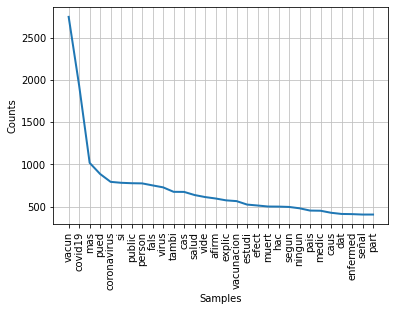

In [18]:
tokens_all_fake = []

for t in fake_docs_clean:
  tokens_all_fake += t['tokens']

freq_dist = FreqDist(tokens_all_fake)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias falsas del conjunto de datos, junto con la media y la desviación estandar de la metrica.

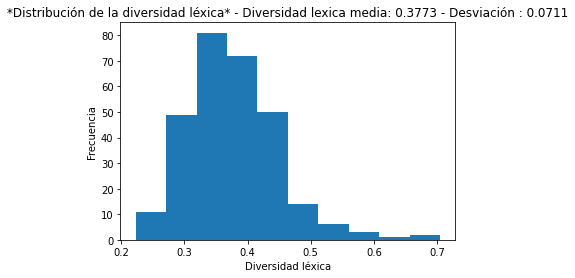

In [19]:
plot_lexical_diversity_dist(docs=fake_docs_raw)

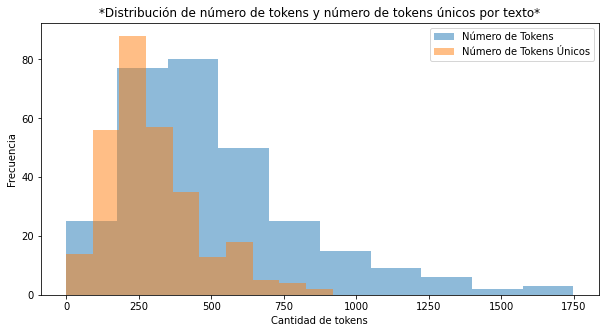

In [20]:
plot_tokens_text(docs=fake_docs_raw)

In [35]:
# Hapax
freq_dist = FreqDist(tokens_all_fake)
hapaxes = [] 
for word, freq in freq_dist.items():
    if freq <= 3:
        hapaxes.append(word)
print(hapaxes[1:10])

['nucleoprotein', 'postinfeccion', 'consistent', 'intensificacion', 'desestim', 'olivi', 'cortison', 'esteroide', 'interrump']


### Procesamiento noticias veridicas

In [22]:
true_docs_clean = []
true_vocabulary = []
for nameText in true_news:
  true_docs_clean.append({'archivo': nameText, 'tokens': tf_idf_prep(textCorpus = true_list, nameText = nameText ,stemmer = 'ss')})
  true_vocabulary +=  tf_idf_prep(textCorpus = true_list, nameText = nameText ,stemmer = 'ss')

Identificación de la frecuencia de las palabras utilizadas en las noticias veridicas del dataset.

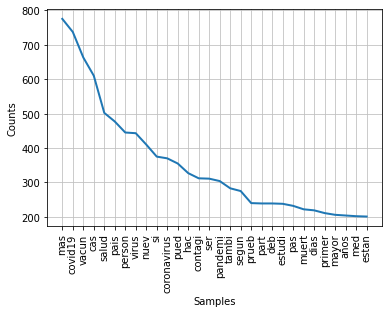

In [23]:
tokens_all_true = []

for t in true_docs_clean:
  tokens_all_true += t['tokens']

freq_dist = FreqDist(tokens_all_true)
freq_dist.plot(30, cumulative=False)
plt.show()

Calculamos la medida de diversidad lexica para cada una de las noticias vericas del conjunto de datos, junto con la media y la desviación estandar de la metrica. 

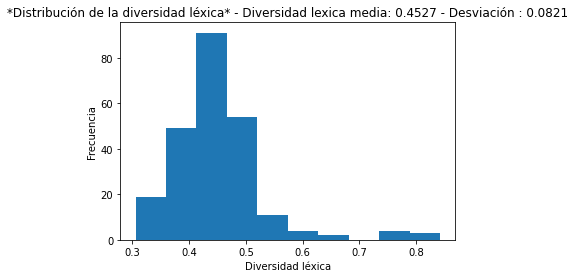

In [24]:
plot_lexical_diversity_dist(docs=true_docs_raw)

In [34]:
# Hapax
freq_dist = FreqDist(tokens_all_true)
hapaxes = [] 
for word, freq in freq_dist.items():
    if freq <= 3:
        hapaxes.append(word)
print(hapaxes[1:10])

['nov', 'prolongacion', 'legislacion', 'algid', 'rts', 'endem', 'sufrag', 'recaer', 'swisscov']


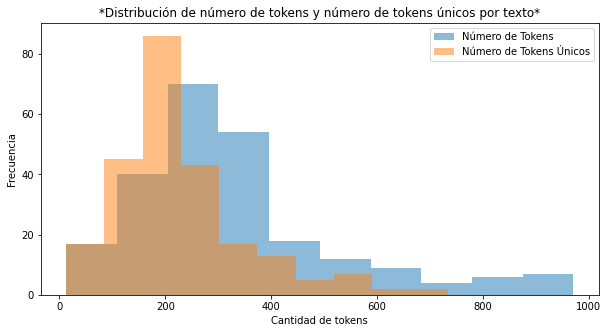

In [26]:
plot_tokens_text(docs=true_docs_raw)

# Analisis de similitud

In [27]:
docs_token_clean = true_docs_clean + fake_docs_clean
print("Total noticias:" , len(docs_token_clean), "\n",
      "Noticias veridicas:" , len(true_docs_clean), "\n",
      "Noticias falsas:", len(fake_docs_clean))

Total noticias: 533 
 Noticias veridicas: 237 
 Noticias falsas: 296


In [36]:
cdf = nltk.ConditionalFreqDist()
for num_doc in docs_token_clean:
  #print(num_doc)
  condition = num_doc['archivo']
  for word in num_doc['tokens']:
    cdf[condition][word] += 1

In [29]:
df_fdist = pd.DataFrame.from_dict(cdf, orient='index').fillna(0)
tf = df_fdist.divide(np.sum(df_fdist, axis=1), axis=0)
idf = np.log10(len(tf) / df_fdist[df_fdist > 0].count()) 
tfidf = np.multiply(tf, idf.to_frame().T)

<ipython-input-29-70d0344fe0a4>:4: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  tfidf = np.multiply(tf, idf.to_frame().T)


In [30]:
tfidf.sort_values(by = 'index', ascending = True)
tfidf

,suiz,prolong,ley,prevencion,covid19,bern,nov,prens,latin,consej,...,anestesi,postural,fisioterapi,aventur,sedant,quinc,traqueostomi,corrupt,enoj,tarim
V- Suiza prolonga ley de prevención contra Covid-19.txt,0.034039,0.013899,0.034782,0.006491,0.001277,0.026195,0.026195,0.008894,0.013287,0.010117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V-G20 se compromete a financiar vacunas contra covid para países pobres.txt,0.003865,0.000000,0.000000,0.000000,0.000217,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V-Identifican mutación del coronavirus que se expandió por Europa.txt,0.025840,0.000000,0.000000,0.000000,0.000242,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V-El ‘shock’ pandémico y los nuevos retos de América Latina.txt,0.002465,0.000000,0.000000,0.000940,0.000185,0.000000,0.000000,0.000000,0.009623,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V-Mutación genética del coronavirus podría hacerlo más contagioso.txt,0.006413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"F- Este video no prueba experimentación con vacunas, es de una serie de televisión.txt",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F-FALSO_No murió una persona en la vía pública de Patio Bonito el 29 de abril.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
F-Es falsa la cadena de WhatsApp que asegura que Éxito está regalando comida.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
V-El covid 19 no está mutando.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
similit=[]
idx = tfidf .index.tolist()
for iname in idx:
  for jname in idx:
    if iname != jname:
      sim=cosine_similarity(tfidf.loc[[iname]].values[0], tfidf.loc[[jname]].values[0])
      similit.append({'Archivo 1': iname,'Archivo 2':jname,'Similitud': sim})



In [32]:
similitud = pd.DataFrame(similit)
similitud = similitud.sort_values(by = 'Similitud', ascending = False)
similitud = similitud[similitud["Similitud"] < 0.9999]
similitud

,Archivo 1,Archivo 2,Similitud
146813,V-Coronavirus_Inmunidad a la vista.txt,V-Coronavirus_ Inmunidad a la vista.txt,0.998722
148926,V-Coronavirus_ Inmunidad a la vista.txt,V-Coronavirus_Inmunidad a la vista.txt,0.998722
212511,F- Receta contra el coronavirus que circula en...,F- ¡Cuidado! Es falsa la receta médica contra...,0.982970
202478,F- ¡Cuidado! Es falsa la receta médica contra...,F- Receta contra el coronavirus que circula en...,0.982970
175522,F- Cuidado con el contenido que dice que ha au...,F- El bulo que dice que han aumentado un 5.400...,0.906167
...,...,...,...
141769,V-Argentina iniciaría vacunación contra la c...,F-Es falsa la cadena de WhatsApp que asegura q...,0.000000
279354,V-El covid 19 no está mutando.txt,F- En España no se ha derogado el uso del tap...,0.000000
7404,V-Dengue le compite al covid-19 y causa más d...,V-El covid 19 no está mutando.txt,0.000000
7405,V-Dengue le compite al covid-19 y causa más d...,F-Usan FOTO VIEJA para señalar que Claudia Lo...,0.000000
